In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
obesity = pd.read_csv("obesity.csv")

In [3]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Example: select numeric columns for clustering
df = obesity[['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O',"FAF","TUE"]]  # adjust columns
X=df

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)


In [7]:
# Add labels to your original dataframe
df = df.copy()
df['cluster'] = labels

# Count cluster members
print(df['cluster'].value_counts())

# Check how many points are noise (label = -1)
print(f"Noise points: {(labels == -1).sum()}")


cluster
-1     1597
 8      178
 10      56
 31      39
 5       19
 6       17
 21      15
 30      11
 0       11
 2       10
 27      10
 23      10
 3        9
 4        9
 25       8
 22       8
 17       7
 13       7
 9        7
 12       7
 26       7
 29       7
 24       6
 32       6
 11       6
 20       5
 19       5
 18       5
 28       5
 7        5
 16       5
 1        5
 14       5
 15       4
Name: count, dtype: int64
Noise points: 1597


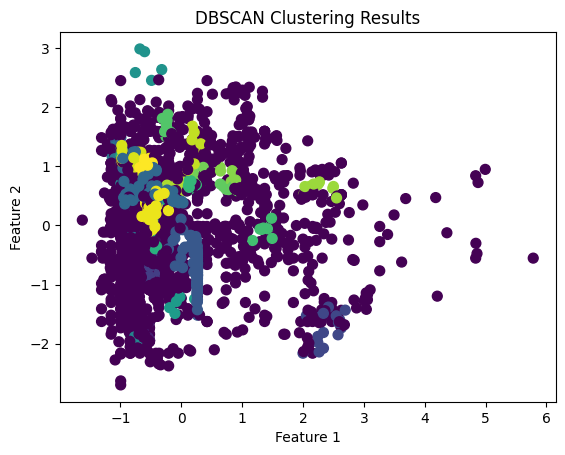

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    print(f"eps={eps}: clusters={n_clusters}, noise={(db.labels_ == -1).sum()}")


eps=0.3: clusters=15, noise=1857
eps=0.5: clusters=33, noise=1597
eps=0.7: clusters=44, noise=1298
eps=1.0: clusters=45, noise=667
